In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 판다스 내장 그래프 도구
Pandas는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있습니다. 다양한 종류의 그래프를 그릴 수 있으며, 각 그래프는 데이터를 시각화하는 데 유용한 정보를 제공합니다.
- 선 그래프 (Line Plot) :
가장 기본적인 선 그래프를 그리며, 시간에 따른 데이터 변화를 시각화하는 데 유용합니다.
- 막대 그래프 (Bar Plot) :
카테고리형 데이터를 시각화하는 데 유용합니다.
- 수평 막대 그래프 (Horizontal Bar Plot) :
카테고리형 데이터를 수평으로 시각화하며, 누적 옵션과 투명도 적용이 가능합니다.
- 히스토그램 (Histogram) :
데이터의 분포를 시각화하는 데 유용합니다.
- 산점도 (Scatter Plot) :
두 변수 간의 관계를 시각화하며, 상관관계를 확인할 수 있습니다.
- 박스 플롯 (Box Plot) :
데이터의 분포와 분산 정도를 시각화하며, 이상치(outliers)를 확인하는 데 유용합니다.
- 면적 그래프 (Area Plot)
면적 그래프는 시간에 따른 데이터의 변화를 누적하여 시각화하는 데 유용합니다. 여러 시계열 데이터를 하나의 플롯에 그릴 수 있으며, 누적된 값의 변화를 시각적으로 쉽게 파악할 수 있습니다.
- 파이 차트 (Pie Chart) :
카테고리형 데이터의 비율을 시각화하는 데 유용합니다.
- 커널 밀도 추정 그래프 (KDE Plot) :
데이터의 확률 밀도 함수를 시각화하며, 데이터의 분포를 부드럽게 나타냅니다.

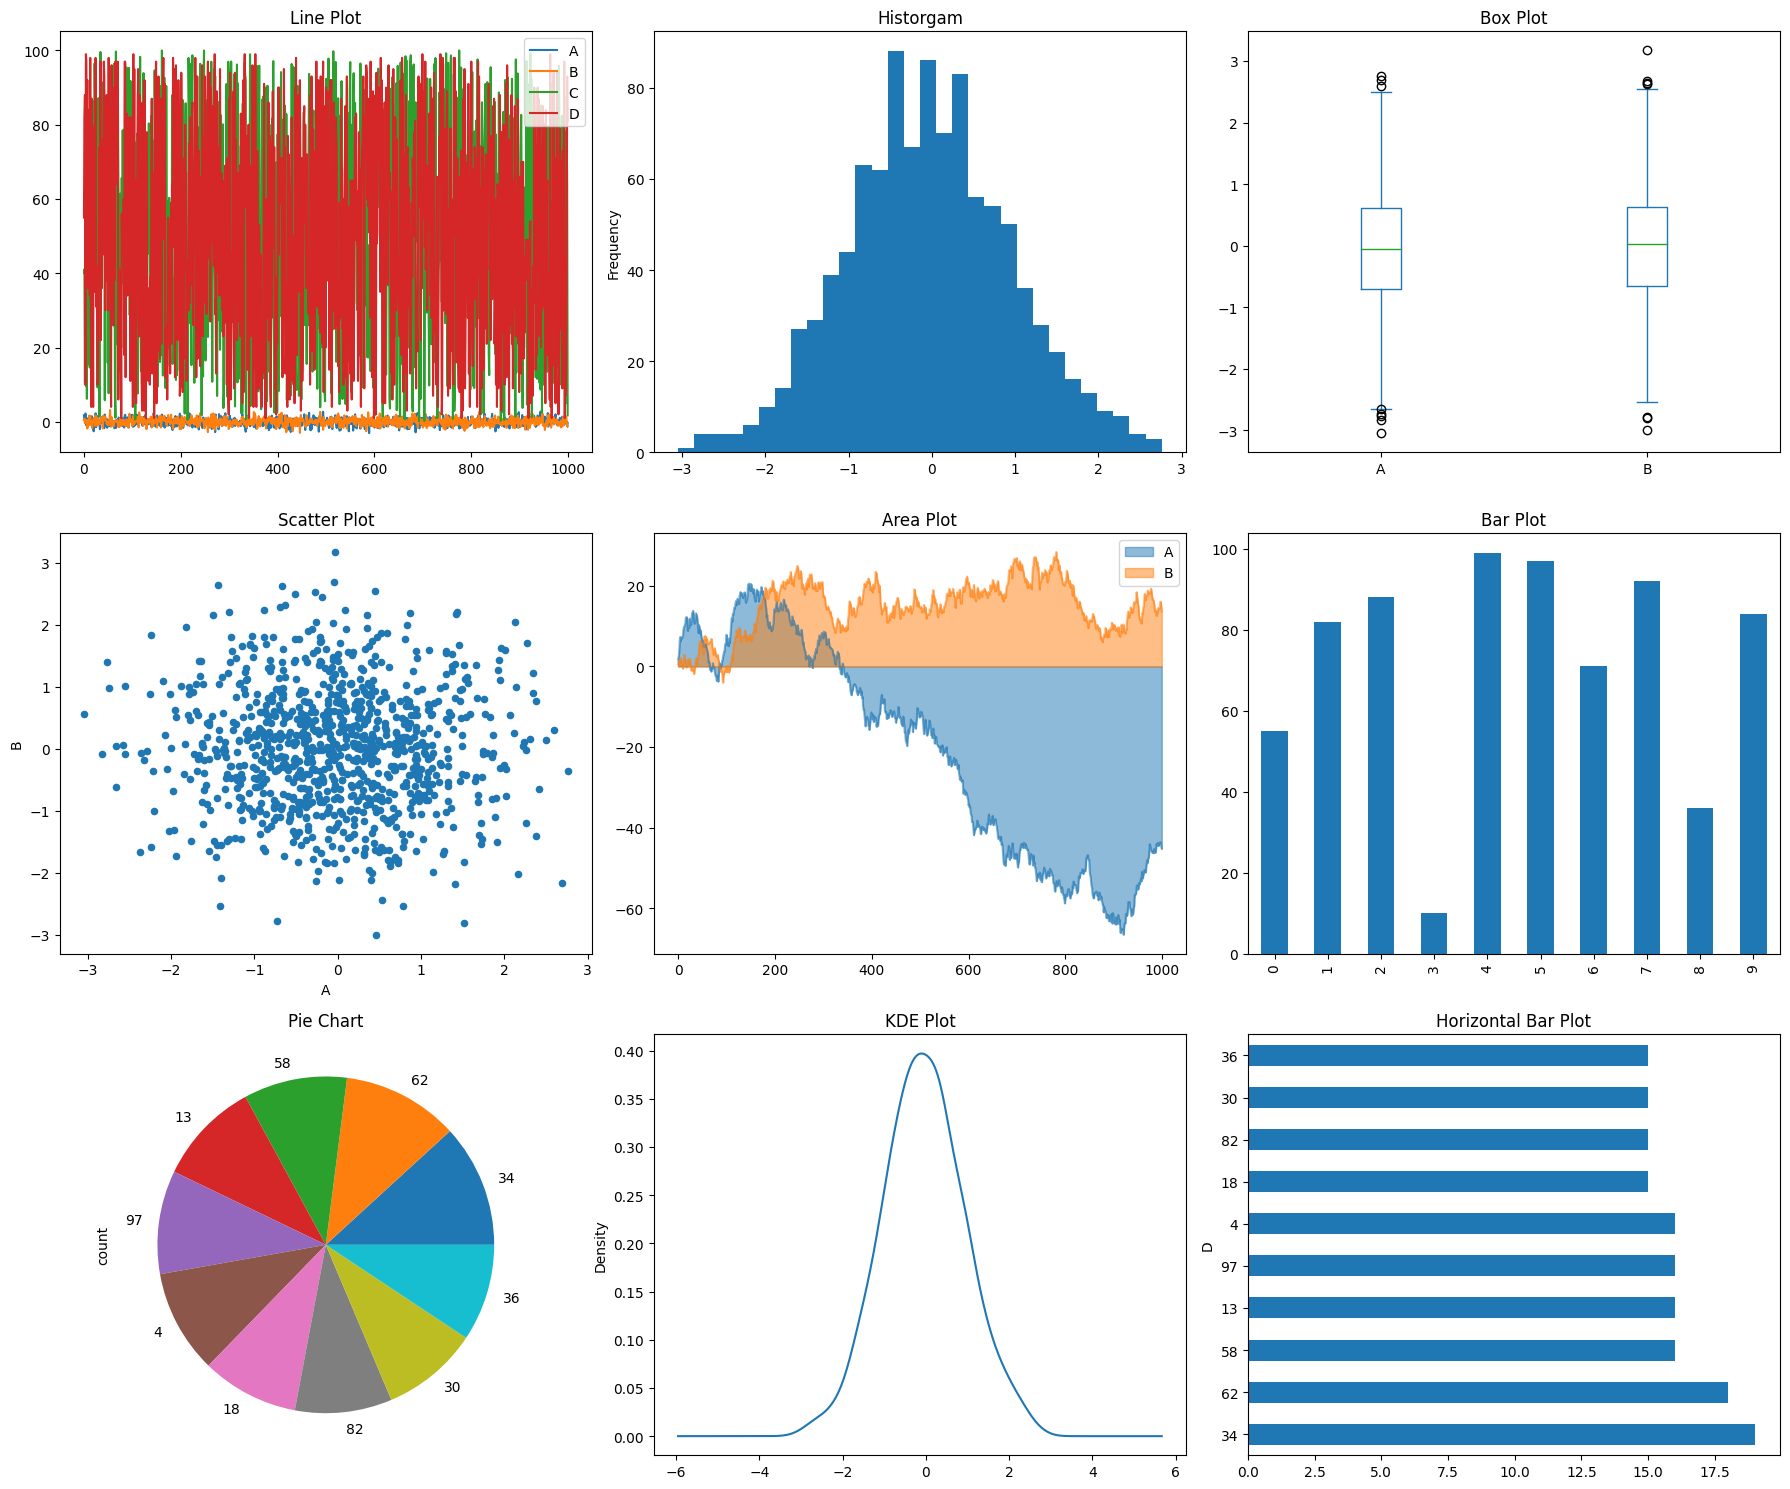

In [ ]:
# 데이터 생성
np.random.seed(0)
df = pd.DataFrame({
  'A': np.random.randn(1000),
  'B': np.random.randn(1000),
  'C': np.random.rand(1000) * 100,
  'D': np.random.randint(1, 100, 1000)
})

# 데이터프레임을 3행 3열 형태로 플롯
fig, axes = plt.subplots(3,3, figsize=(18,15))

# 라인 플롯
df.plot(ax=axes[0,0], title='Line Plot')

# 히스토그램
df['A'].plot(kind='hist', bins=30, ax=axes[0,1], title='Historgam')

# 박스 플롯
df[['A', 'B']].plot(kind='box', ax=axes[0,2], title='Box Plot')

# 산점도
df.plot(kind='scatter', x='A', y='B', ax=axes[1,0], title='Scatter Plot')

# 면적 그래프(stacked=False는 두 시리즈가 곂치지 않도록 하는 옵션)
df[['A', 'B']].cumsum().plot(kind='area', ax=axes[1,1], title='Area Plot',stacked=False)

# 막대 그래프(상위 10개)
df['D'].head(10).plot(kind='bar', ax=axes[1,2], title='Bar Plot')

# 파이 그래프
df['D'].value_counts().head(10).plot(kind='pie', ax=axes[2,0], title='Pie Chart')

# 커널 밀도 추정 그래프
df['A'].plot(kind='kde', ax=axes[2,1], title='KDE Plot')

# 수평 막대 그래프
df['D'].value_counts().head(10).plot(kind='barh', ax=axes[2,2], title='Horizontal Bar Plot')

# 레이아웃 조정
plt.tight_layout()
plt.show()

        Num
0  0.746781
1  0.239185
2  0.967475
3  0.974452
4  0.485506
                Num
count  10000.000000
mean       0.500459
std        0.287536
min        0.000004
25%        0.251907
50%        0.502315
75%        0.748835
max        0.999971
Axes(0.125,0.11;0.775x0.77)


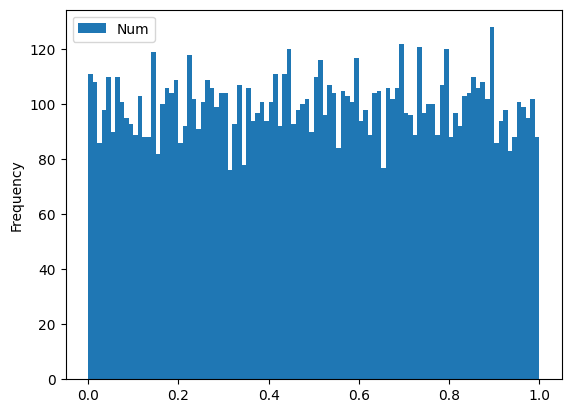

In [ ]:
# Q. 평균 0, 표준편차 1인 표준 정규분포 난수 10000개로 데이터 프레임생성
# 통계요약표 및 시각화를 수행하세요(컬럼명 'Num')

data = np.random.rand(10000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
print(df.describe(), '\n')
print(df.plot(kind='hist', bins=100))

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698 

Axes(0.125,0.11;0.775x0.77)


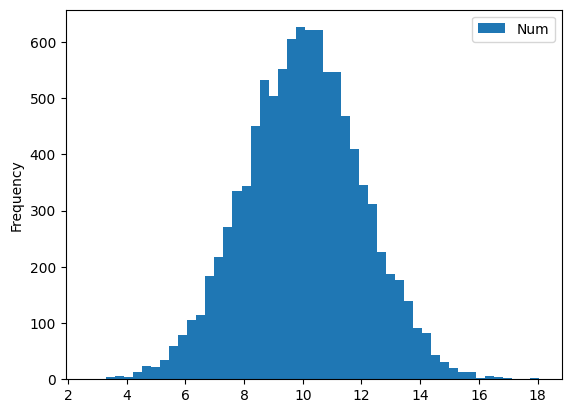

In [ ]:
from scipy import stats
np.random.seed(1)

# 평균 10, 표준편차 2인 정규분포에서 샘플 10000개 추출
sample1 = stats.norm.rvs(loc=10, scale=2, size=10000) # loc:평균, scale:표준편차, size:샘플
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe(), '\n')
print(df1.plot(kind='hist', bins=50))

In [ ]:
df = pd.DataFrame(np.random.rand(6,4),
                index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=['A','B','C','D'])

df

,A,B,C,D
one,0.865081,0.032853,0.933223,0.267461
two,0.124448,0.340698,0.765585,0.090553
three,0.310120,0.890913,0.894145,0.270737
four,0.335384,0.077759,0.169704,0.280080
five,0.314396,0.789679,0.982823,0.394681
six,0.787791,0.204297,0.848268,0.705182


In [ ]:
# 0,1 사이의 균일분포에서 6행 4열 난수 추출
df = pd.DataFrame(np.random.rand(6,4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=['A','B','C','D'])

<Axes: >

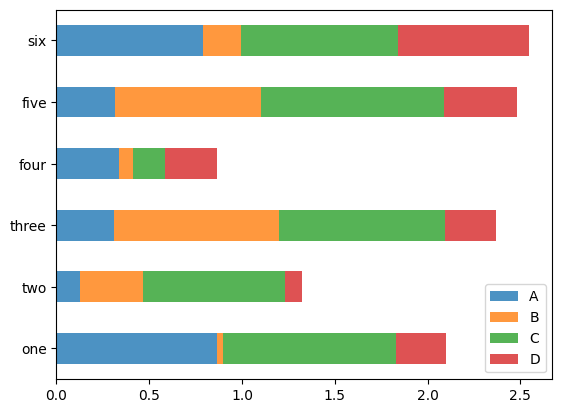

In [ ]:
df.plot(kind='barh', stacked=True, alpha=0.8)

In [ ]:
# 아래 df에 대하여 수직 막대그래프, 수평 막대그래프, 수직스택막대그래프, 수평스택막대그래프를 작성하세요

df = pd.DataFrame(np.random.rand(8,3),
                  index=['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'],
                  columns=pd.Index(['A','B','C'], name='Species'))

df

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

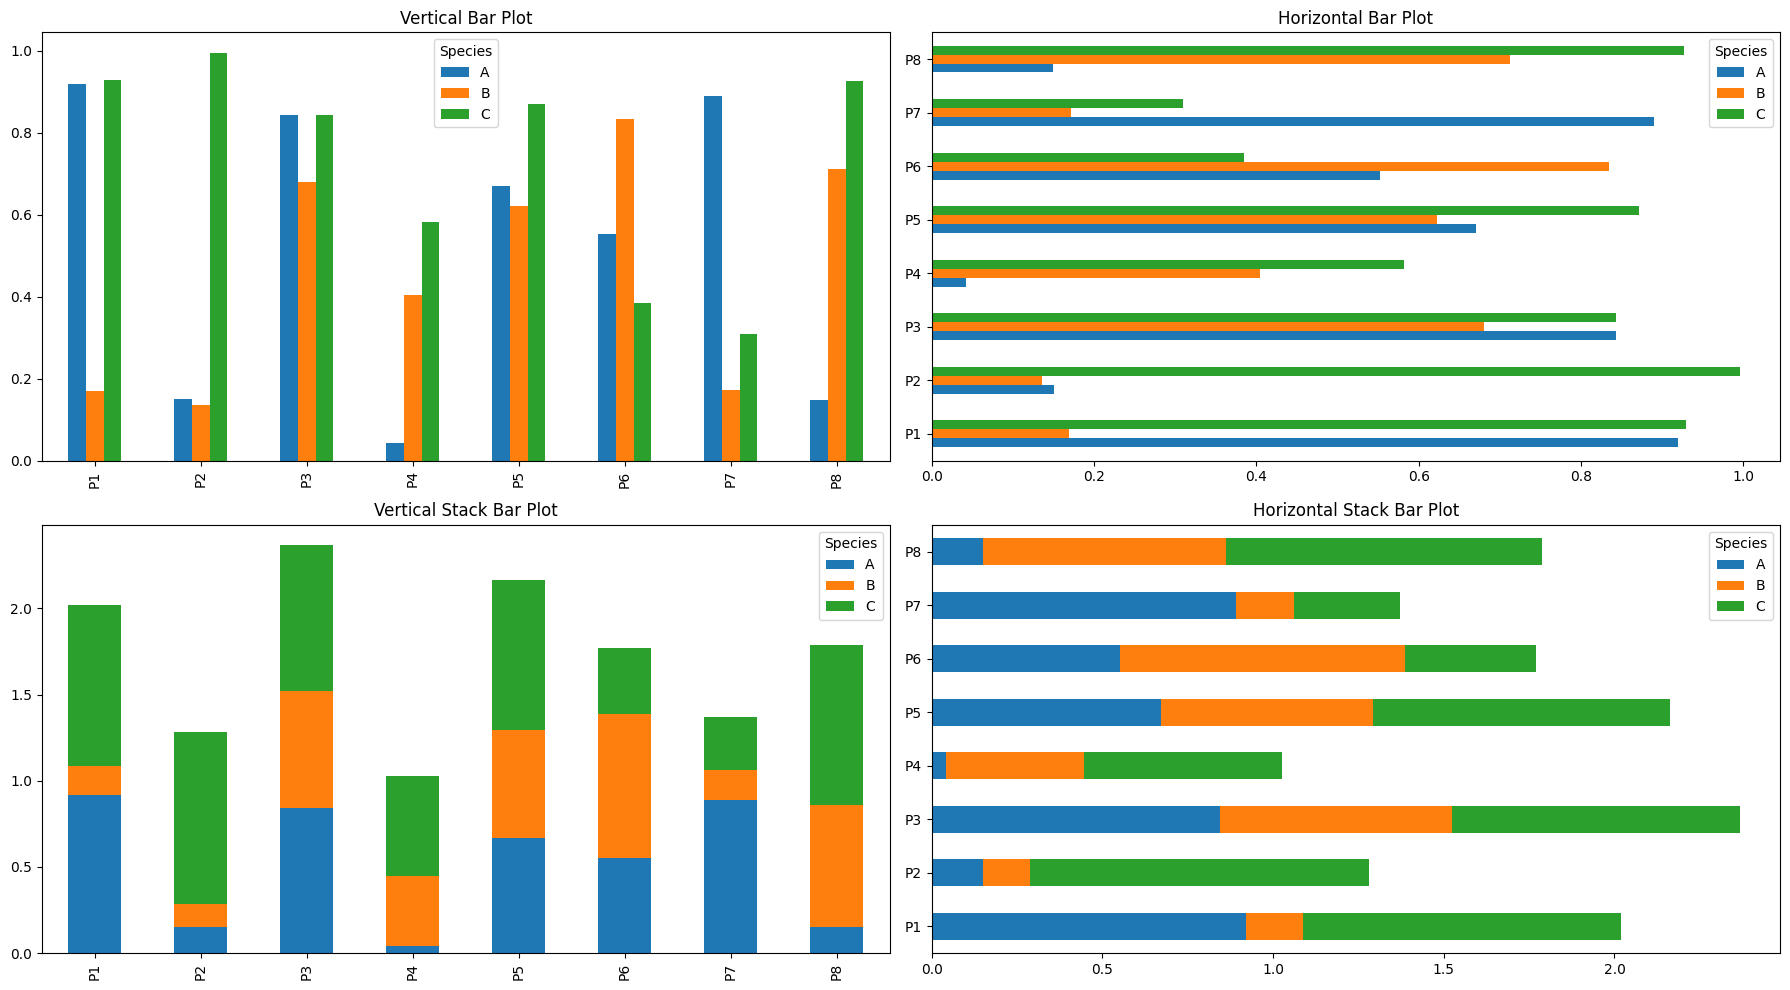

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(18,10))
#fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12,18))

# 수직 막대그래프
df.plot(kind='bar', ax=axes[0,0], title='Vertical Bar Plot')

# 수평 막대그래프
df.plot(kind='barh', ax=axes[0,1], title='Horizontal Bar Plot')

# 수직 스택막대그래프
df.plot(kind='bar', stacked=True, ax=axes[1,0], title='Vertical Stack Bar Plot')

# 수평 스택막대그래프
df.plot(kind='barh', stacked=True, ax=axes[1,1], title='Horizontal Stack Bar Plot')

# 레이아웃 조정
plt.tight_layout()
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

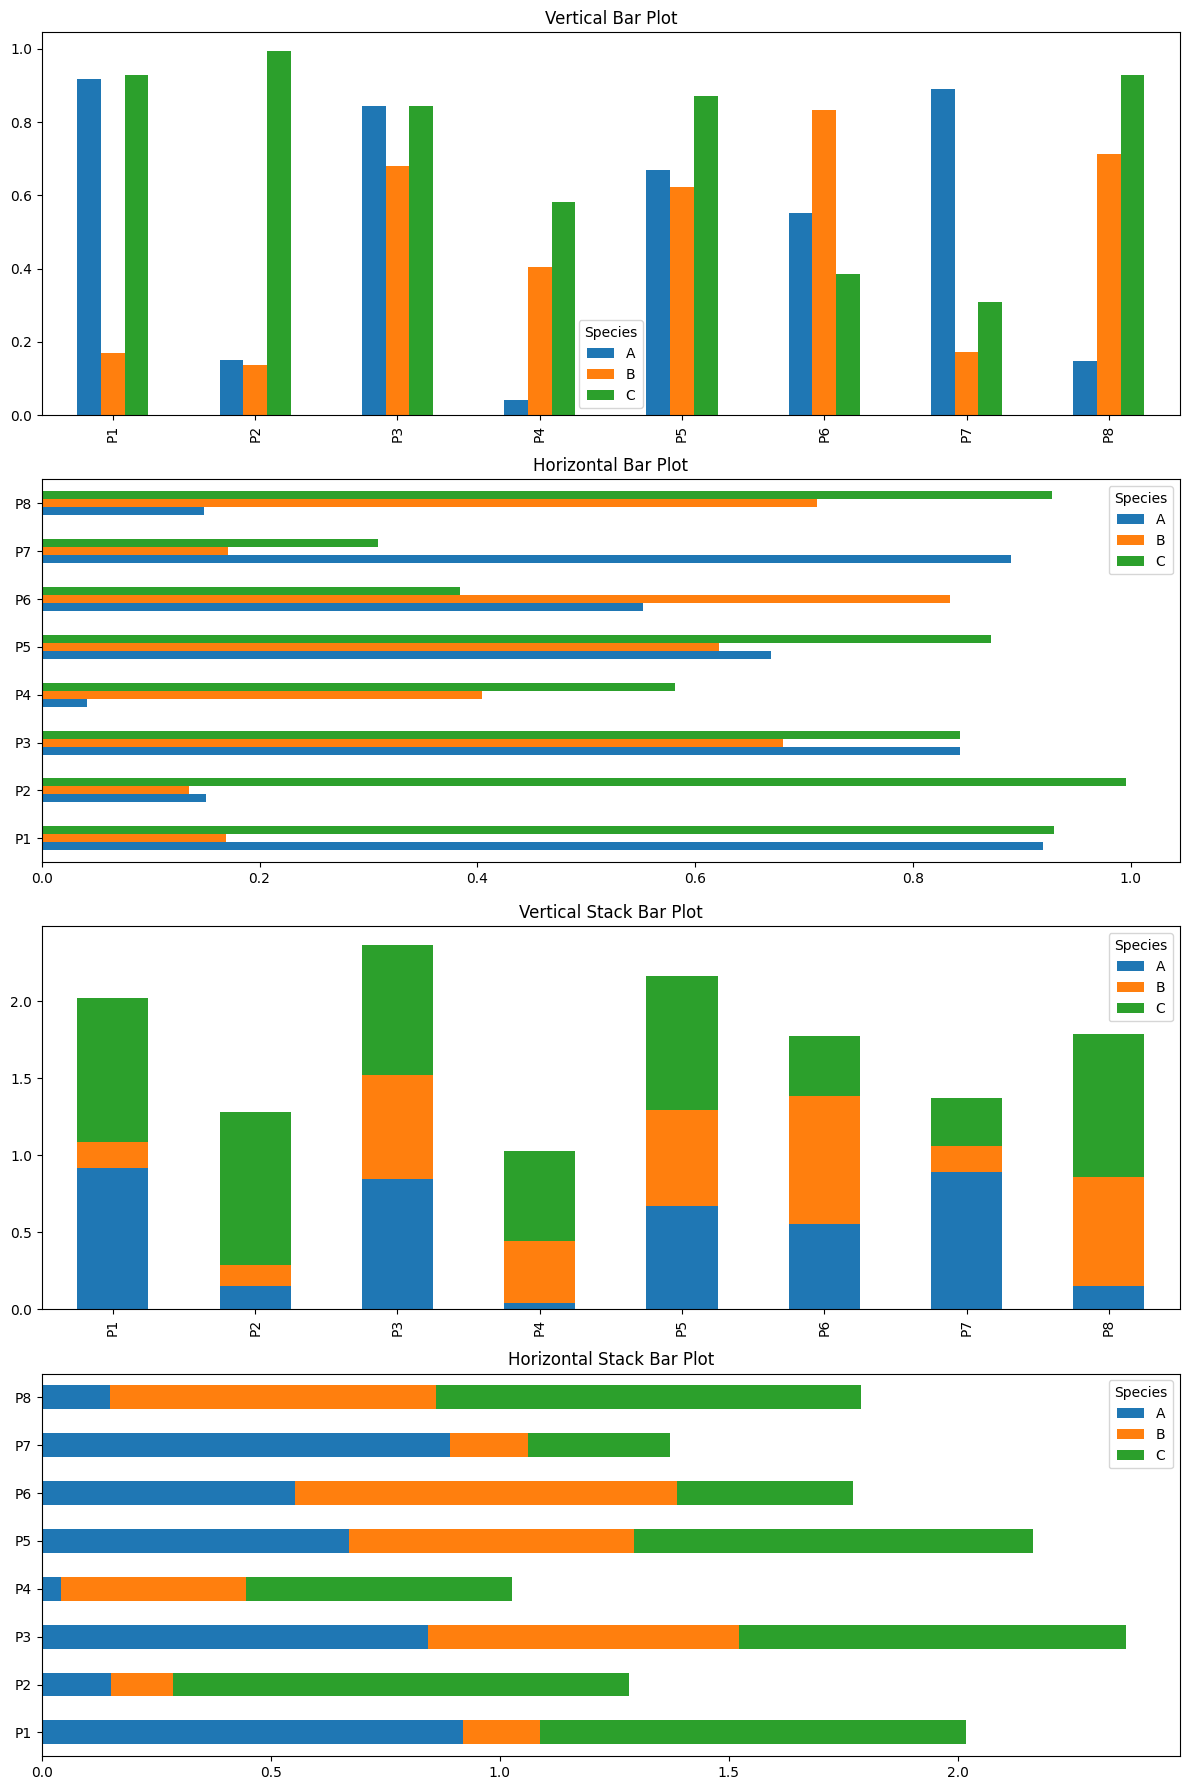

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12,18))

# 수직 막대그래프
df.plot(kind='bar', ax=axes[0])
axes[0].set_title('Vertical Bar Plot')

# 수평 막대그래프
df.plot(kind='barh', ax=axes[1])
axes[1].set_title('Horizontal Bar Plot')

# 수직 스택막대그래프
df.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Vertical Stack Bar Plot')

# 수평 스택막대그래프
df.plot(kind='barh', stacked=True, ax=axes[3])
axes[3].set_title('Horizontal Stack Bar Plot')

# 레이아웃 조정
plt.tight_layout()
plt

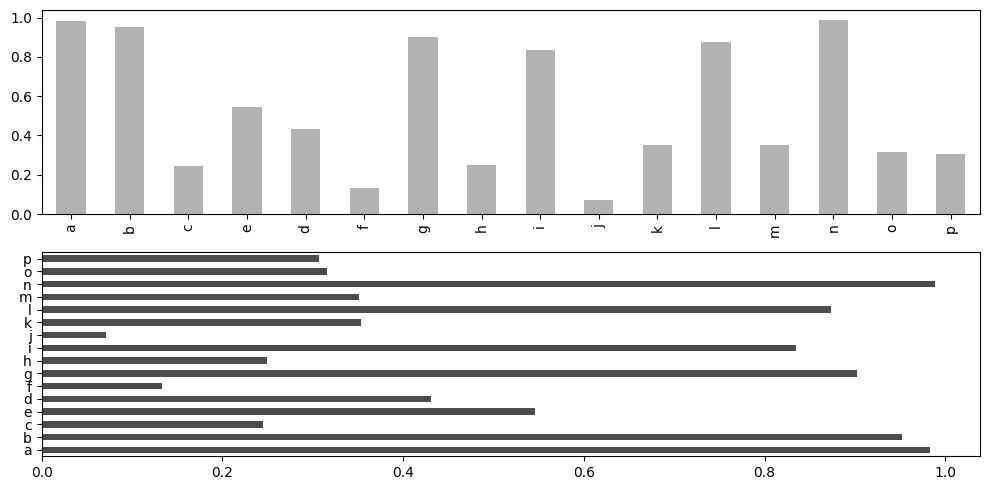

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data = pd.Series(np.random.rand(16), index=list('abcedfghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.3)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
plt.tight_layout()
plt.show()

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)
- sns.heatmap(data,)

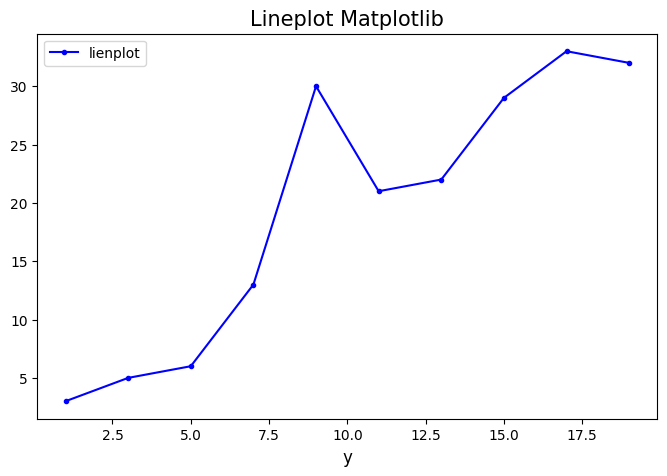

In [ ]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(8,5))
plt.plot(x,y,color='blue', marker='o', markersize=3)
plt.title('Lineplot Matplotlib', size=15)
plt.xlabel('x',size=12)
plt.xlabel('y',size=12)
plt.legend(labels=['lienplot'])

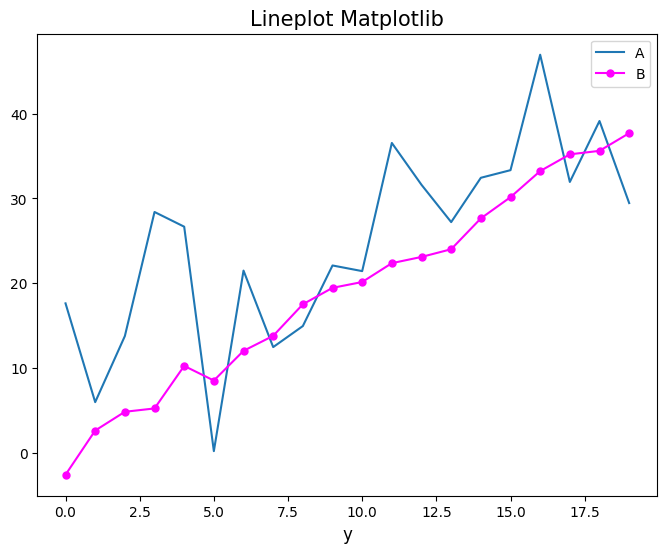

In [ ]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2+np.random.randn(20)

plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2, color='magenta', marker='o', markersize=5)
plt.xlabel('x',size=12)
plt.xlabel('y',size=12)
plt.title('Lineplot Matplotlib', size=15)
plt.legend(['A','B'])

Text(0.5, 0, 'x')

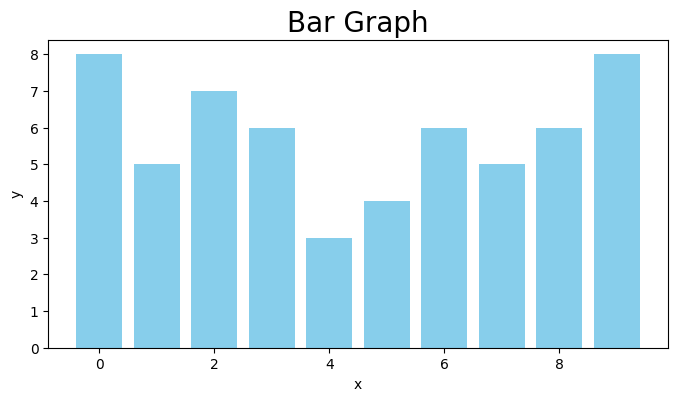

In [ ]:
# 막대그래프
y = np.random.randint(2,10, size=10)
x = range(len(y))

plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8, color='skyblue')
plt.title('Bar Graph', size=20)
plt.ylabel('y')
plt.xlabel('x')

Text(0.5, 0, 'mpg')

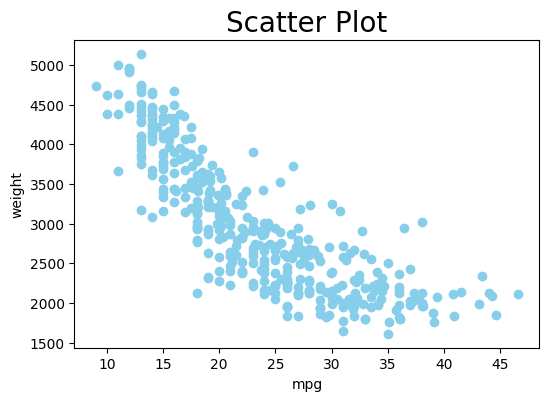

In [ ]:
df_auto = pd.read_excel('drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='skyblue')
plt.title('Scatter Plot', size=20)
plt.ylabel('weight')
plt.xlabel('mpg')

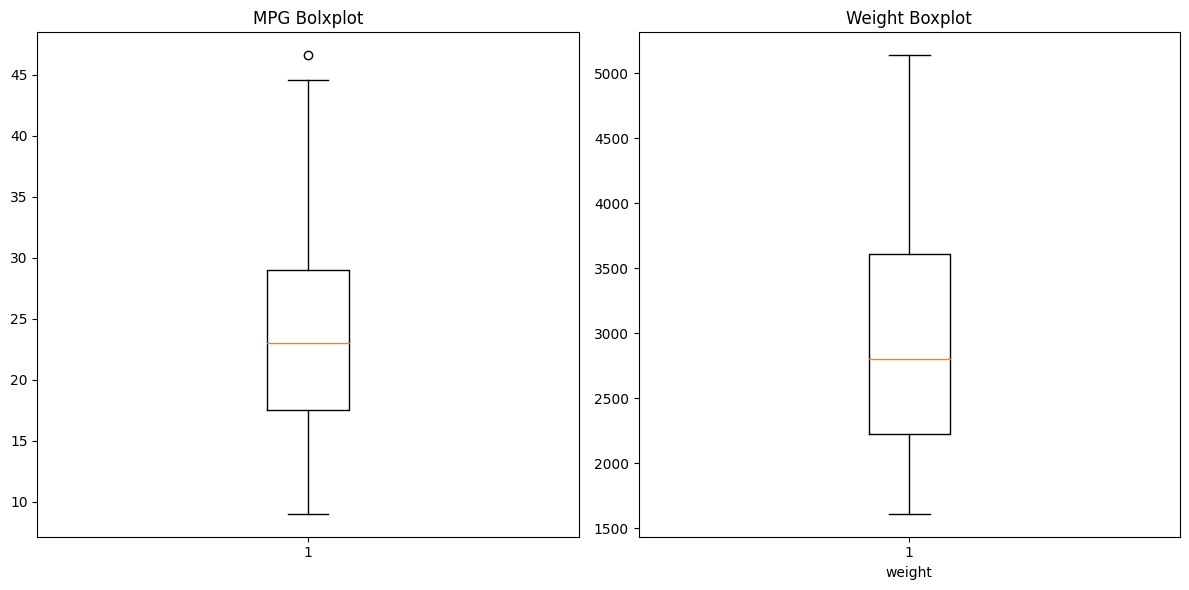

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_auto.mpg)
plt.title('MPG Boxplot')
plt.subplot(1,2,2)
plt.boxplot(df_auto.weight)
plt.title('Weight Boxplot')
plt.xlabel('weight')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

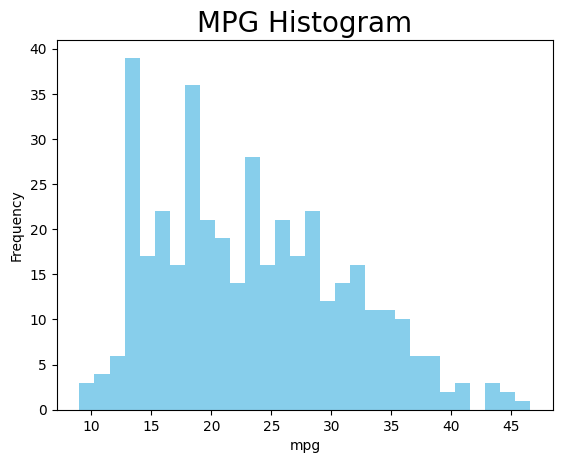

In [ ]:
plt.hist(df_auto.mpg, bins=30, color='skyblue')
plt.title('MPG Histogram', size=20)
plt.xlabel('mpg')
plt.ylabel('Frequency')

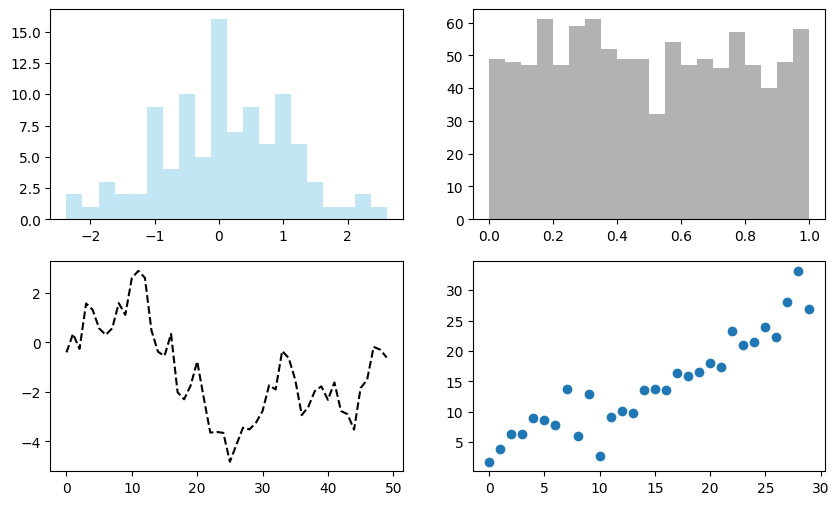

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins=20, color='skyblue', alpha=0.5)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
#ax1.set_title('Histogram')
#ax1.set_xlabel('Value')

In [ ]:
# matplotlib 스타일 변경
plt.style.available # ggplot 많이 사용함

(array([ 2.,  1.,  2.,  5.,  4.,  6., 14., 10., 13., 13., 10.,  9.,  3.,
         4.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([-2.52985837, -2.23162508, -1.93339178, -1.63515848, -1.33692519,
        -1.03869189, -0.74045859, -0.4422253 , -0.143992  ,  0.15424129,
         0.45247459,  0.75070789,  1.04894118,  1.34717448,  1.64540778,
         1.94364107,  2.24187437,  2.54010766,  2.83834096,  3.13657426,
         3.43480755]),
 <BarContainer object of 20 artists>)

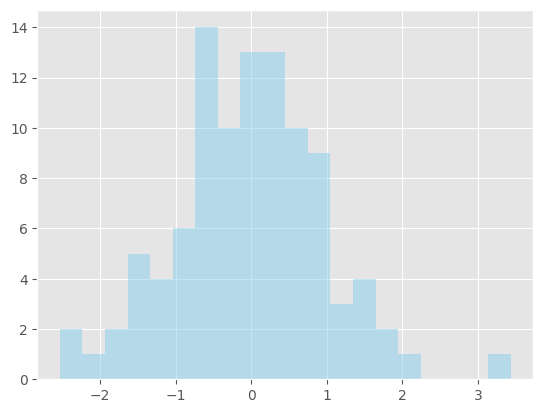

In [ ]:
plt.style.use('ggplot')
plt.hist(np.random.randn(100), bins=20, color='skyblue', alpha=0.5)

Text(0, 0.5, 'weight')

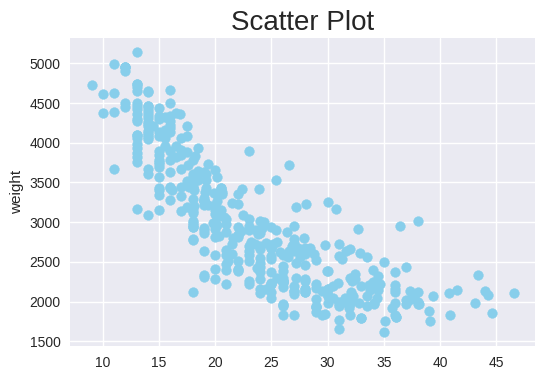

In [ ]:
plt.style.use('seaborn-v0_8')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='skyblue')
plt.title('Scatter Plot', size=20)
plt.ylabel('weight')

In [ ]:
# 설치 후 세선 다시 시작
# Google Colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts-nanum # NanumBarunGothic 글꼴 설치
!sudo fc-cache -fv # 글꼴 캐시 새로고침
!rm ~/.cache/matplotlib -rf # Matplotlib 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,569 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

In [ ]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10], '\n')
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ] 



array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

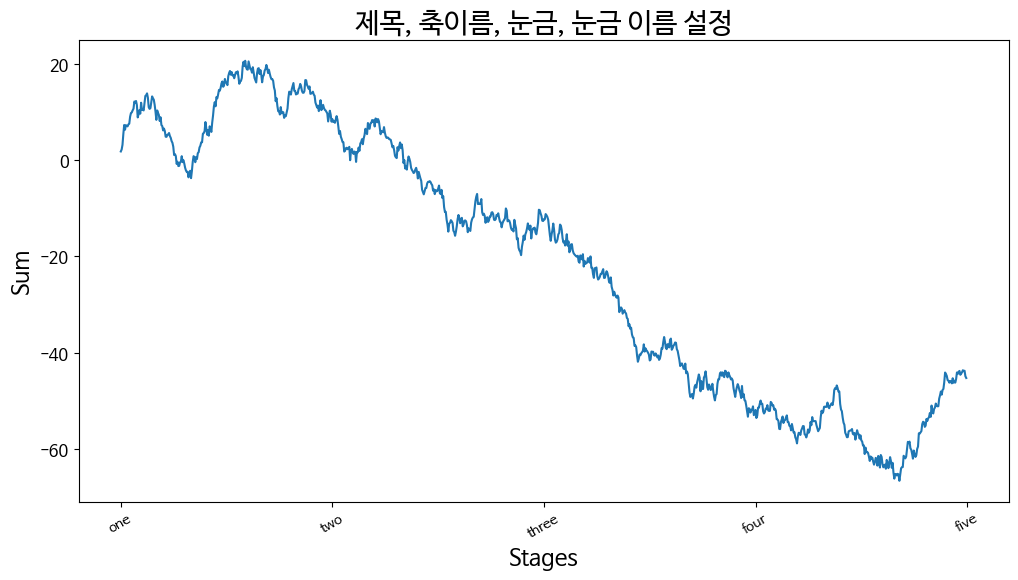

In [ ]:
# 한글 폰트 설정

plt.rc('font', size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000]) # 눈금
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정', size=20)
ax.set_xlabel('Stages', size=16)
ax.set_ylabel('Sum', size=16)
plt.show()